<a href="https://colab.research.google.com/github/aschauhan241/git_test/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
 

 Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])                 # Data Summary ( Check for missing values )
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values :  
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


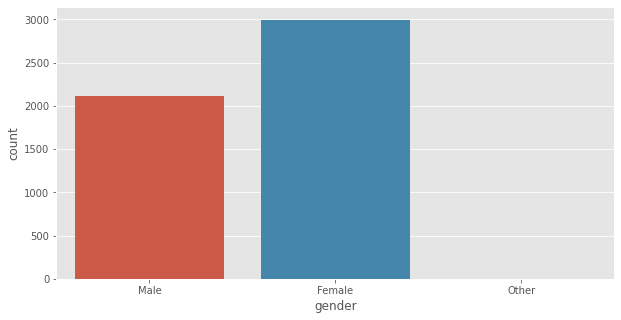

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');   #There is about 1000 diffrence between Female and Male in the data

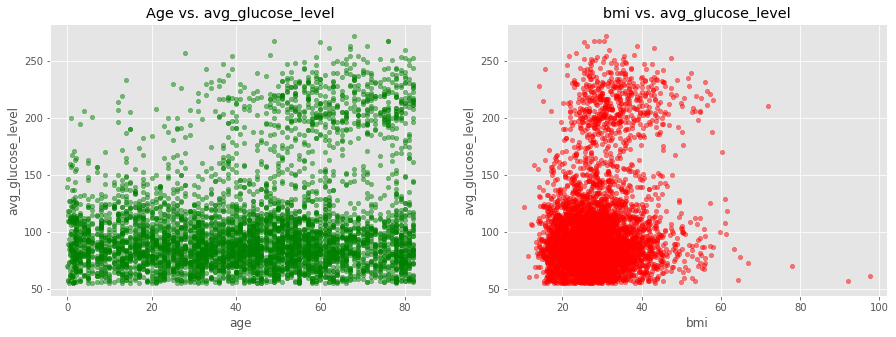

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()         

# Visualize some features which maybe have correlation with avg glucose level

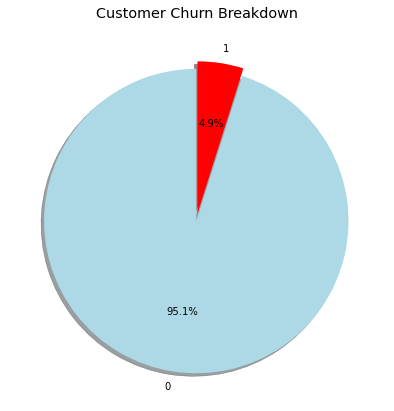

In [10]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
  
# Only 5% percent of people have Stroke !

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

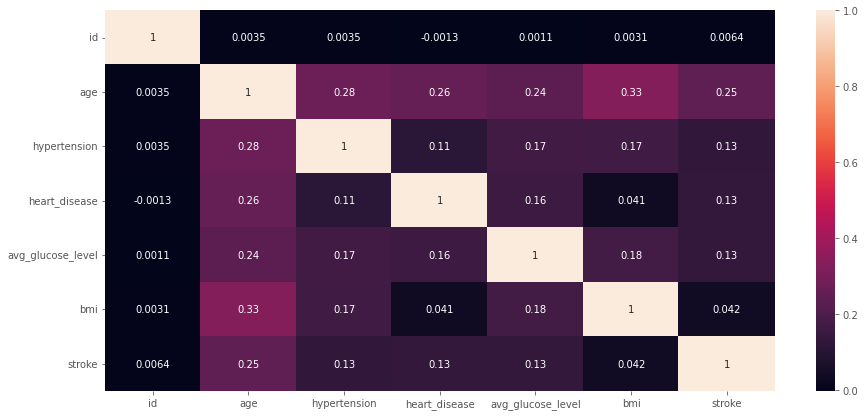

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);  # There is no correlation between stroke and BMI

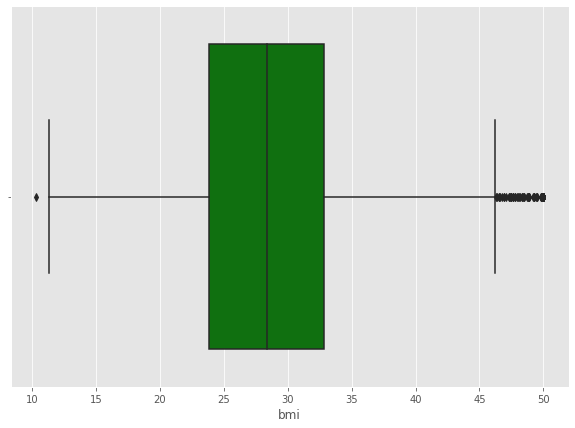

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');   # we have many outliers 

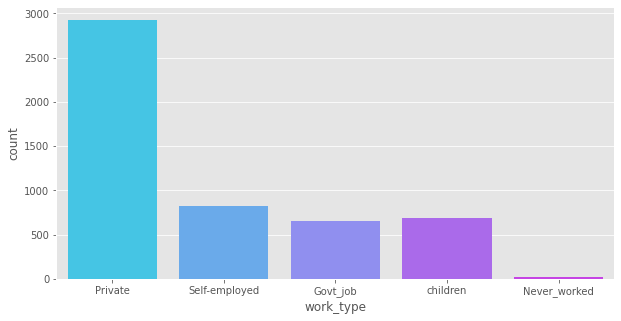

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='work_type',palette='cool'); # Private job people have more strokes

In [14]:
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)   

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

# Encoding Categorical variables 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [ ]:
# Scaling The variance in Features
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.069344,1.051434
1,51676,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,-0.051399,0.786070
2,31112,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,0.508972,1.626390
3,60182,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,0.768657,0.255342
4,1665,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-0.652774,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,-0.051399,1.626390
5106,44873,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.534042,1.670617
5107,19723,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,0.249288,-0.363842
5108,37544,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-0.434092,0.343796


In [ ]:
df=df.drop(columns='id',axis=1)  # Drop ID feature and check for nulls

In [ ]:
df[df.isnull().any(axis=1)]

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age


In [ ]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)
ab_clf.fit(X_train, y_train)

y_pred= ab_clf.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

ab_clf_score = ab_clf.score(X_train, y_train)
print("Training Score: ")
print(ab_clf_score)

ab_clf_test = ab_clf.score(X_test, y_test)
print("Testing Score: ")
print(ab_clf_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1453
           1       0.15      0.14      0.14        80

    accuracy                           0.91      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.91      0.91      0.91      1533

Confusion Matrix: 
[[1390   63]
 [  69   11]]
Training Score: 
1.0
Testing Score: 
0.913894324853229


In [ ]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#== 
#Score 
#== 
y_pred= xgboost.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

xgboost_score = xgboost.score(X_train, y_train)
print("Training Score: ")
print(xgboost_score)

xgboost_test = xgboost.score(X_test,y_test)
print("Testing Score: ")
print(xgboost_test)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

Confusion Matrix: 
[[1451    2]
 [  80    0]]
Training Score: 
0.9603019289907744
Testing Score: 
0.9465101108936725


In [ ]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

svc_score = svc.score(X_train, y_train)
print("Training Score: ")
print(svc_score)

svc_test = svc.score(X_test,y_test)
print("Testing Score: ")
print(svc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

Confusion Matrix: 
[[1453    0]
 [  80    0]]
Training Score: 
0.9527537042214146
Testing Score: 
0.9478147423352903


In [ ]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

forest_score = forest.score(X_train, y_train)
print("Training Score: ")
print(forest_score)

forest_test = forest.score(X_test,y_test)
print("Testing Score: ")
print(forest_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

Confusion Matrix: 
[[1451    2]
 [  80    0]]
Training Score: 
1.0
Testing Score: 
0.9465101108936725


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

lr_score = lr.score(X_train, y_train)
print("Training Score: ")
print(lr_score)

lr_test = lr.score(X_test,y_test)
print("Testing Score: ")
print(lr_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

Confusion Matrix: 
[[1453    0]
 [  80    0]]
Training Score: 
0.9530332681017613
Testing Score: 
0.9478147423352903


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)
mlp.fit(X_train, y_train)
y_pred= mlp.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

mlp_score = mlp.score(X_train, y_train)
print("Training Score: ")
print(mlp_score)

mlp_test = mlp.score(X_test,y_test)
print("Testing Score: ")
print(mlp_test)

Iteration 1, loss = 0.29231424
Iteration 2, loss = 0.16475923
Iteration 3, loss = 0.15504598
Iteration 4, loss = 0.15202363
Iteration 5, loss = 0.15148000
Iteration 6, loss = 0.14854459
Iteration 7, loss = 0.14660258
Iteration 8, loss = 0.14500130
Iteration 9, loss = 0.14119937
Iteration 10, loss = 0.14000862
Iteration 11, loss = 0.13914410
Iteration 12, loss = 0.13615597
Iteration 13, loss = 0.13413320
Iteration 14, loss = 0.13066972
Iteration 15, loss = 0.12707884
Iteration 16, loss = 0.12480027
Iteration 17, loss = 0.12032836
Iteration 18, loss = 0.11589931
Iteration 19, loss = 0.10996074
Iteration 20, loss = 0.10790988
Iteration 21, loss = 0.10574071
Iteration 22, loss = 0.10015561
Iteration 23, loss = 0.09269712
Iteration 24, loss = 0.08900359
Iteration 25, loss = 0.09137782
Iteration 26, loss = 0.08753918
Iteration 27, loss = 0.08059442
Iteration 28, loss = 0.07215968
Iteration 29, loss = 0.07590468
Iteration 30, loss = 0.07368406
Iteration 31, loss = 0.06585985
Iteration 32, los

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

gnb_score = gnb.score(X_train, y_train)
print("Training Score: ")
print(gnb_score)

gnb_test = gnb.score(X_test,y_test)
print("Testing Score: ")
print(gnb_test)

              precision    recall  f1-score   support

           0       1.00      0.34      0.51      1453
           1       0.08      1.00      0.14        80

    accuracy                           0.37      1533
   macro avg       0.54      0.67      0.32      1533
weighted avg       0.95      0.37      0.49      1533

Confusion Matrix: 
[[491 962]
 [  0  80]]
Training Score: 
0.35672351132233715
Testing Score: 
0.3724722765818656
